McDonalds Nutrition Dataset

I'm pretty sure we've all eaten something from the McDonalds menu and most of us have complained about the broken ice cream machines. This Dataset includes all major McDonalds menu items listed with their menu categories and nutritive facts. Now if you want to analyze the quality of food or perform classification of menu types , It's all upto you. I have made a lot of effort to not only manually group the menu items but also included my personal Indian special McAloo Tikki.

Dietary habits have been exponentially worsening for a majority of people these days. A proper analysis of nutrition data and reports would be super helpful in spreading awarness about what people are actually consuming disguised as a tempting burger.

Import Libs

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import Data

In [248]:
df=pd.read_csv('mcdonaldata.csv')


Head of Data

In [249]:
df.head()

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular


Drop unwanted column

In [250]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Information of the Data


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        141 non-null    object 
 1   servesize   141 non-null    object 
 2   calories    141 non-null    object 
 3   protien     141 non-null    float64
 4   totalfat    141 non-null    float64
 5   satfat      141 non-null    float64
 6   transfat    141 non-null    float64
 7   cholestrol  141 non-null    float64
 8   carbs       141 non-null    float64
 9   sugar       141 non-null    float64
 10  addedsugar  141 non-null    float64
 11  sodium      141 non-null    float64
 12  menu        141 non-null    object 
dtypes: float64(9), object(4)
memory usage: 14.4+ KB


Convert from object to float for better insights 

In [252]:
df['servesize'] = df['servesize'].astype(float)
df['calories'] = df['calories'].astype(float)

Find Null Value

In [253]:
for i in df.columns:
    print(i,"---->",df[i].isnull().sum()/100,("%"))

item ----> 0.0 %
servesize ----> 0.0 %
calories ----> 0.0 %
protien ----> 0.0 %
totalfat ----> 0.0 %
satfat ----> 0.0 %
transfat ----> 0.0 %
cholestrol ----> 0.0 %
carbs ----> 0.0 %
sugar ----> 0.0 %
addedsugar ----> 0.0 %
sodium ----> 0.0 %
menu ----> 0.0 %


Unique in dataset

In [254]:
for i in df.columns:
    print(i,"---->",df[i].unique())

item ----> ['McVeggie Burger' 'McAloo Tikki Burger' 'McSpicy\x99 Paneer Burger'
 'Spicy Paneer Wrap' 'American Veg Burger' 'Veg Maharaja Mac\xa0'
 'Green Chilli Aloo Naan p' 'Pizza Puff\xa0' 'Mc chicken Burger\xa0'
 'FILLET-O-FISH Burger\xa0' '\xa0Mc Spicy Chicken Burger\xa0'
 '\xa0Spicy Chicken Wrap\xa0' '\xa0Chicken Maharaja Mac\xa0'
 'American Chicken Burger\xa0' 'Chicken Kebab Burger\xa0'
 'Green Chilli Kebab naan' 'Mc Egg Masala Burger'
 'Mc Egg Burger for Happy Meal'
 'Ghee Rice with Mc Spicy Fried Chicken 1 pc' 'McSpicy Fried Chicken 1 pc'
 '4 piece Chicken McNuggets\xa0' '6 piece Chicken McNuggets\xa0'
 '9 piece Chicken McNuggets\xa0' '2 piece Chicken Strips\xa0'
 '3 piece Chicken Strips\xa0' '5 piece Chicken Strips\xa0'
 'Regular Fries\xa0' 'Medium Fries' '\xa0Large Fries\xa0' 'Regular Wedges'
 'Medium Wedges\xa0' 'Large Wedges' '\xa0L1 Coffee\xa0'
 'L1 Coffee with milk\xa0' 'Double Chocochips Muffin\xa0'
 'Vanilla Chocochips Muffin' 'Veg McMuffin' 'Double Cheese McMuffin'
 'S

Describe()

In [255]:
df.describe()

,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,221.978723,242.397447,7.493333,10.060355,5.000099,1.108865,26.321128,30.770851,15.409504,10.336950,362.918809
std,124.979313,184.453579,8.336949,10.435455,4.898097,7.319814,50.348006,20.664969,15.674007,14.283388,477.792553
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.790000,116.360000,0.650000,0.460000,0.330000,0.070000,1.470000,15.630000,2.280000,0.000000,41.990000
50%,212.500000,217.360000,4.790000,7.770000,4.270000,0.150000,8.390000,29.880000,9.160000,3.640000,150.900000
75%,301.000000,331.170000,10.880000,14.160000,7.280000,0.250000,31.110000,45.390000,26.950000,19.230000,530.540000
max,544.000000,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


Plot pairplot for better look

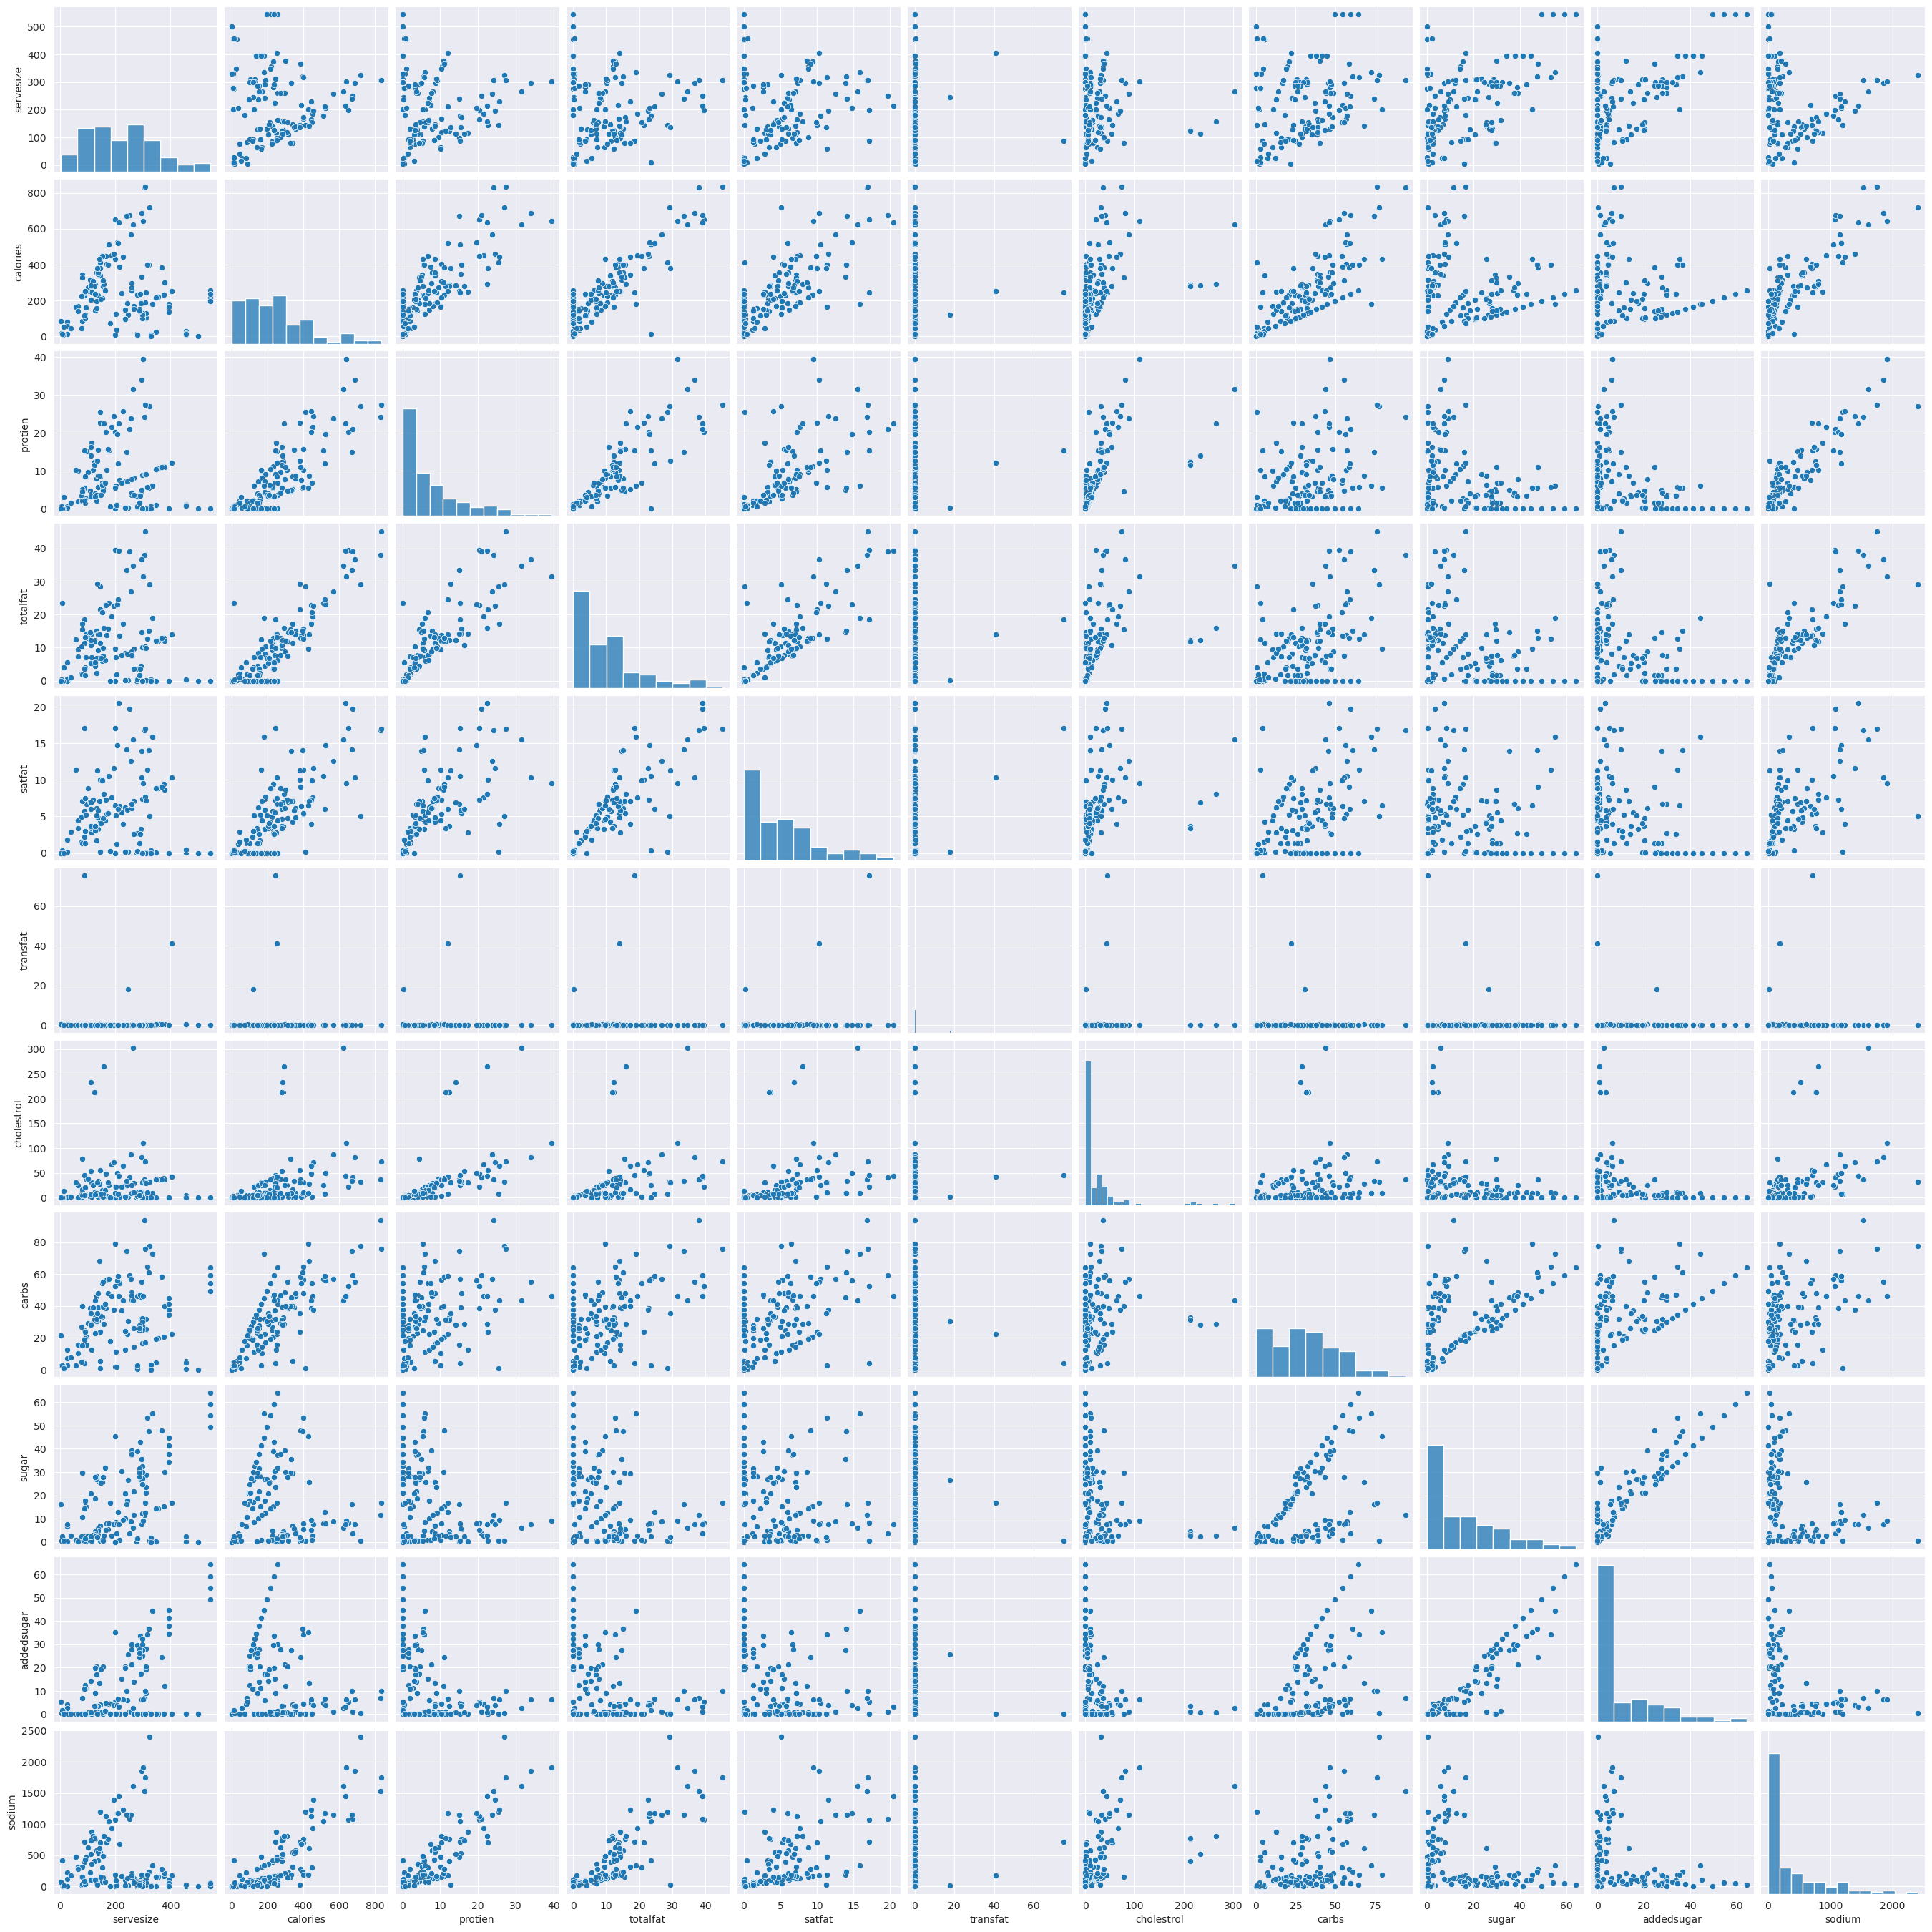

In [256]:
sns.pairplot(df)

Plot Corr matrix graph 

/tmp/ipykernel_17365/3695782288.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

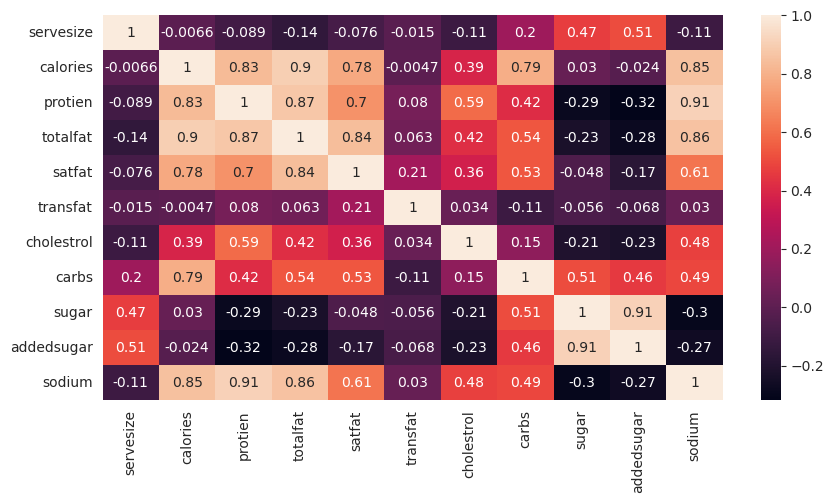

In [257]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)

In [258]:
df.columns

Index(['item', 'servesize', 'calories', 'protien', 'totalfat', 'satfat',
       'transfat', 'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium',
       'menu'],
      dtype='object')

Histogram 

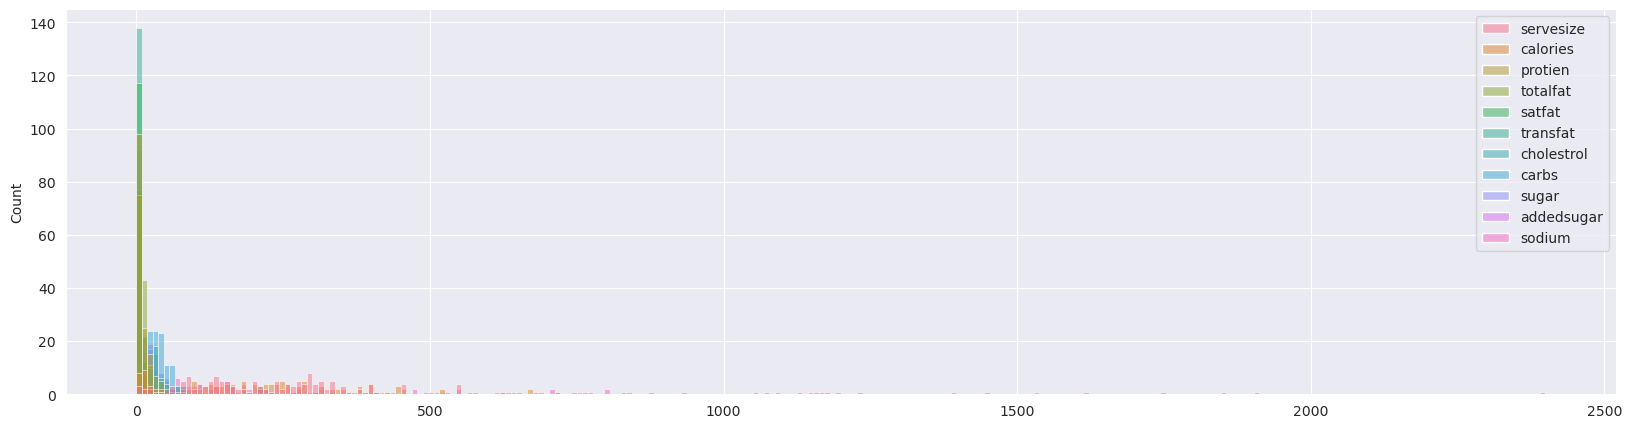

In [259]:
plt.figure(figsize=(20,5))
sns.histplot(data=df)
plt.show()

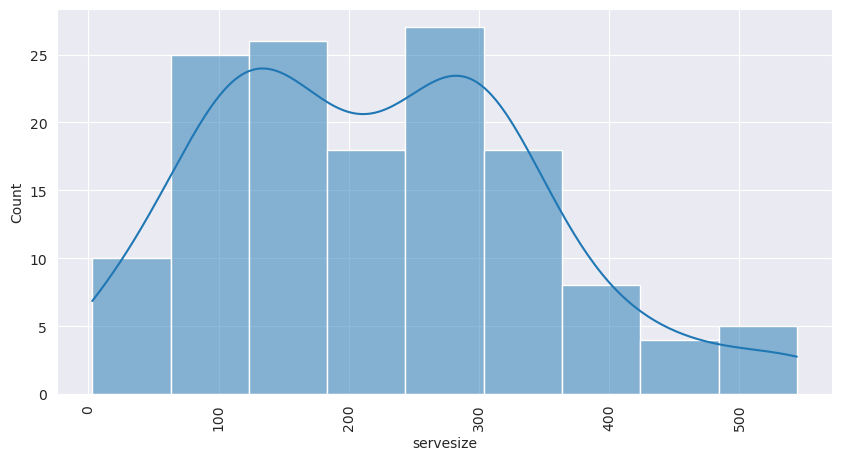

In [260]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['servesize'],kde=True)
plt.xticks(rotation=90)
plt.show()

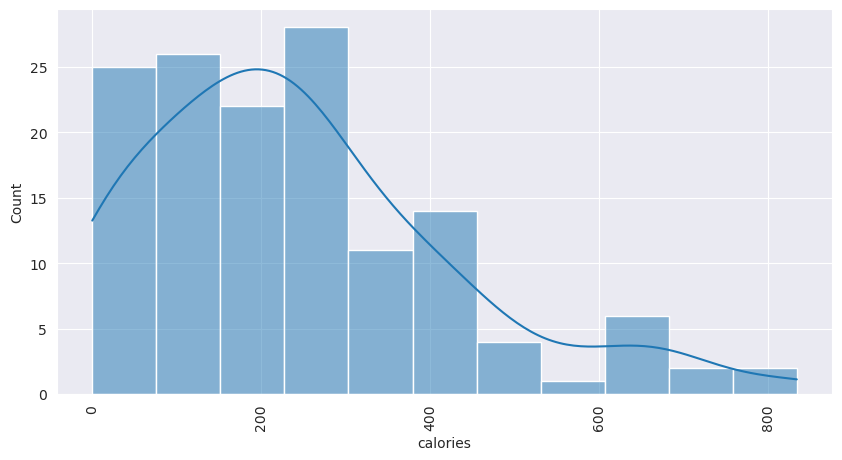

In [261]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['calories'],kde=True)
plt.xticks(rotation=90)
plt.show()

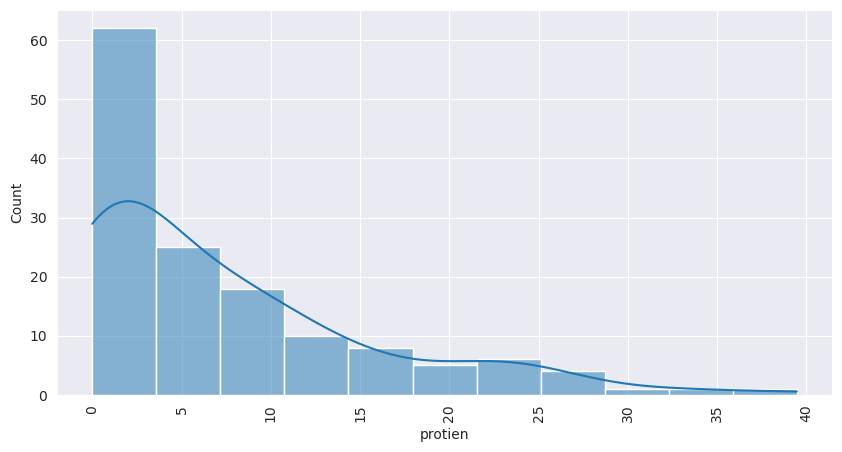

In [262]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['protien'],kde=True)
plt.xticks(rotation=90)
plt.show()

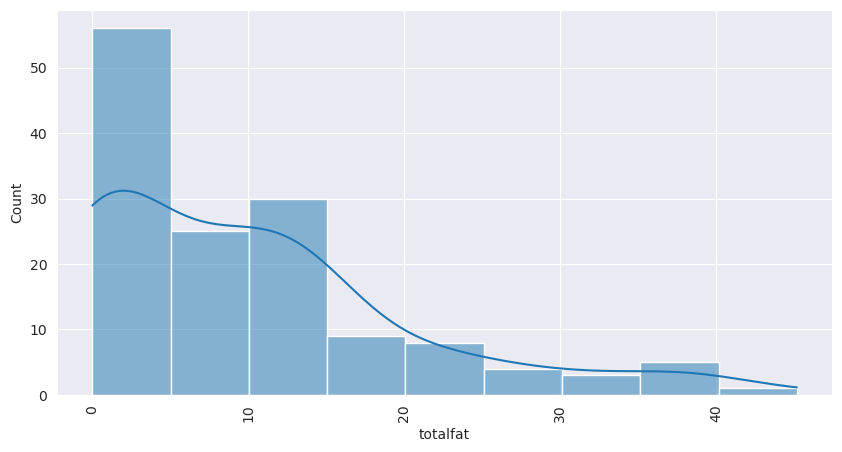

In [263]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['totalfat'],kde=True)
plt.xticks(rotation=90)
plt.show()

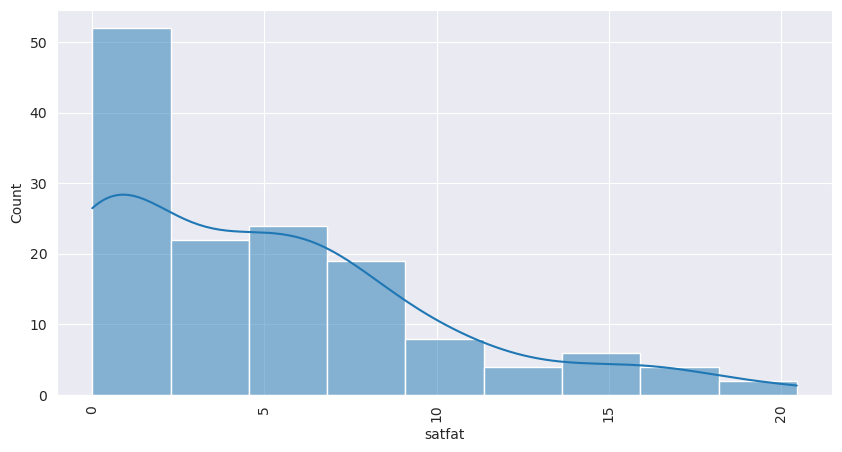

In [264]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['satfat'],kde=True)
plt.xticks(rotation=90)
plt.show()

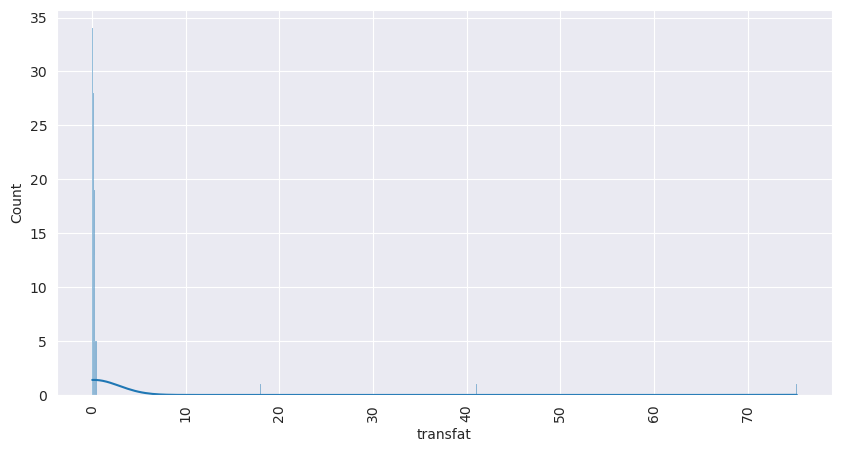

In [265]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['transfat'],kde=True)
plt.xticks(rotation=90)
plt.show()

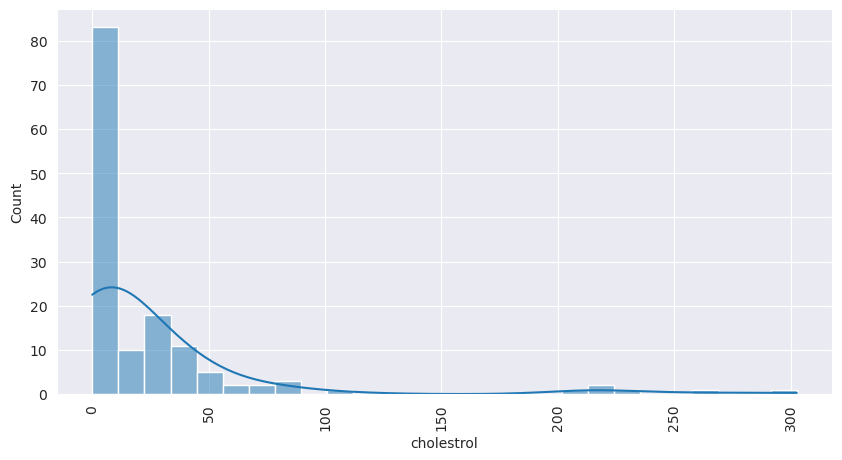

In [266]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['cholestrol'],kde=True)
plt.xticks(rotation=90)
plt.show()

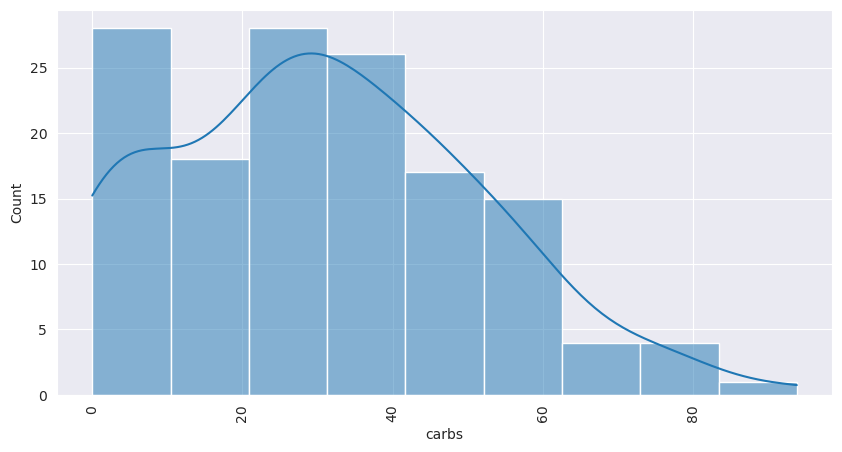

In [267]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['carbs'],kde=True)
plt.xticks(rotation=90)
plt.show()

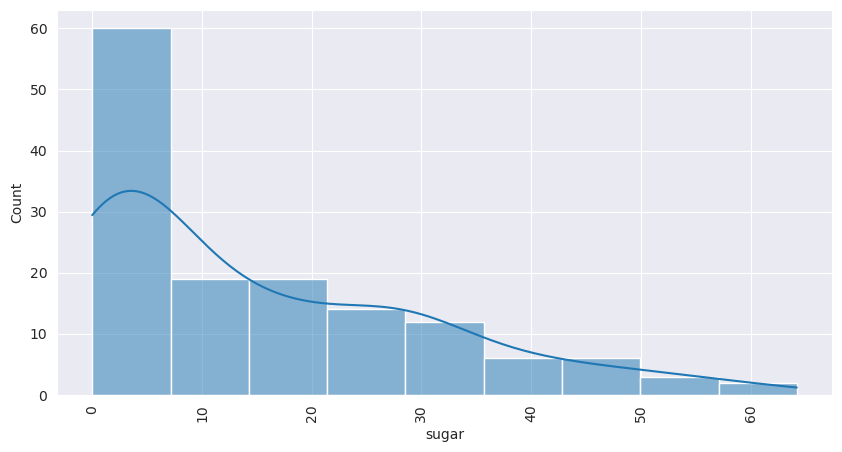

In [268]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['sugar'],kde=True)
plt.xticks(rotation=90)
plt.show()

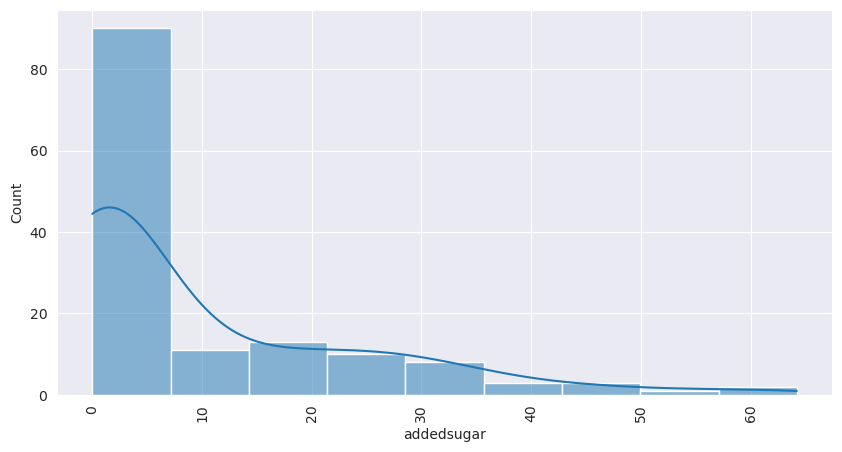

In [269]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['addedsugar'],kde=True)
plt.xticks(rotation=90)
plt.show()

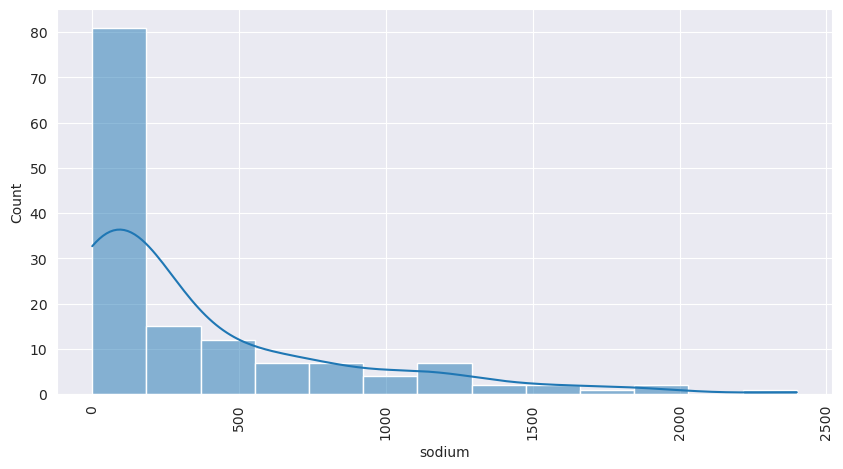

In [270]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['sodium'],kde=True)
plt.xticks(rotation=90)
plt.show()

Count plot of Menu

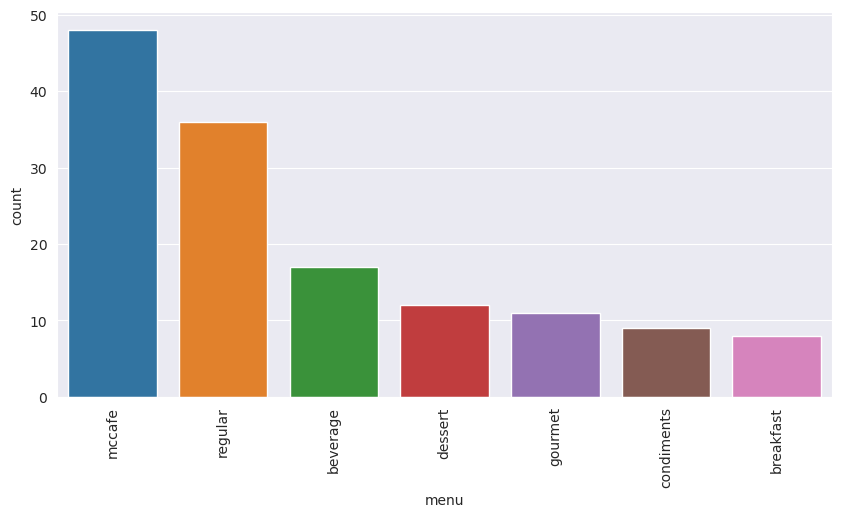

In [271]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df['menu'],order=df.menu.value_counts().index)
plt.xticks(rotation=90)
plt.show()

Count plot of Item

/home/ray/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 153 (\x99) missing from current font.



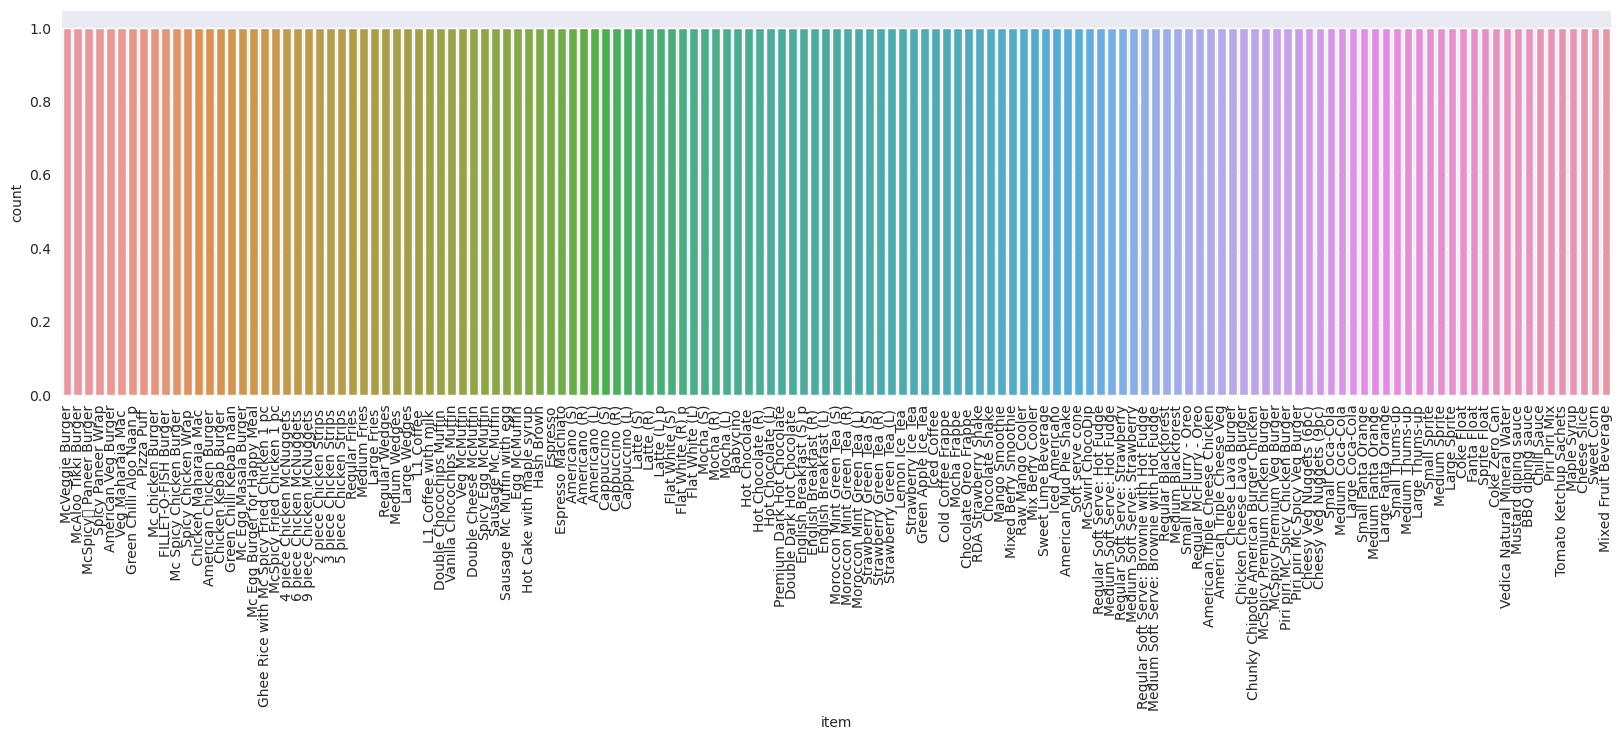

In [272]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x=df['item'])
plt.xticks(rotation=90)
plt.show()

In [273]:
df.corr()

/tmp/ipykernel_17365/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
servesize,1.000000,-0.006646,-0.088983,-0.144483,-0.076125,-0.015167,-0.111177,0.200097,0.468617,0.507552,-0.107376
calories,-0.006646,1.000000,0.833290,0.900121,0.776620,-0.004685,0.385956,0.788981,0.029938,-0.023656,0.851800
protien,-0.088983,0.833290,1.000000,0.871684,0.701758,0.079694,0.590339,0.415551,-0.287476,-0.319260,0.909905
totalfat,-0.144483,0.900121,0.871684,1.000000,0.844072,0.062986,0.421340,0.535279,-0.226667,-0.282666,0.859849
satfat,-0.076125,0.776620,0.701758,0.844072,1.000000,0.212726,0.362520,0.531387,-0.047899,-0.174590,0.614493
transfat,-0.015167,-0.004685,0.079694,0.062986,0.212726,1.000000,0.034111,-0.110521,-0.056378,-0.067910,0.029505
cholestrol,-0.111177,0.385956,0.590339,0.421340,0.362520,0.034111,1.000000,0.152886,-0.206585,-0.225116,0.475366
carbs,0.200097,0.788981,0.415551,0.535279,0.531387,-0.110521,0.152886,1.000000,0.506368,0.455133,0.493693
sugar,0.468617,0.029938,-0.287476,-0.226667,-0.047899,-0.056378,-0.206585,0.506368,1.000000,0.911110,-0.299733
addedsugar,0.507552,-0.023656,-0.319260,-0.282666,-0.174590,-0.067910,-0.225116,0.455133,0.911110,1.000000,-0.265877


Box plot to see the distribution

In [274]:
fig = px.box(y = df['servesize'], title = 'Serving size in grams/ml')
fig.show()

In [275]:
fig = px.box(y = df['calories'], title = 'Calories Distribution')
fig.show()

In [276]:
fig = px.box(y = df['protien'], title = 'Protien Distribution')
fig.show()

In [277]:
fig = px.box(y = df['totalfat'], title = 'Total_Fat Distribution')
fig.show()

In [278]:
fig = px.box(y = df['satfat'], title = 'Sat_Fat Distribution')
fig.show()

In [279]:
fig = px.box(y = df['transfat'], title = 'Trans_Fat Distribution')
fig.show()

In [280]:
fig = px.box(y = df['cholestrol'], title = 'Cholestrol Distribution')
fig.show()

In [281]:
fig = px.box(y = df['carbs'], title = 'Carbs Distribution')
fig.show()

In [282]:
fig = px.box(y = df['sugar'], title = 'Sugar Distribution')
fig.show()

In [283]:
fig = px.box(y = df['addedsugar'], title = 'Added_Sugar Distribution')
fig.show()

In [284]:
fig = px.box(y = df['sodium'], title = 'Sodium Distribution')
fig.show()

In [285]:
df.corr()

/tmp/ipykernel_17365/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
servesize,1.000000,-0.006646,-0.088983,-0.144483,-0.076125,-0.015167,-0.111177,0.200097,0.468617,0.507552,-0.107376
calories,-0.006646,1.000000,0.833290,0.900121,0.776620,-0.004685,0.385956,0.788981,0.029938,-0.023656,0.851800
protien,-0.088983,0.833290,1.000000,0.871684,0.701758,0.079694,0.590339,0.415551,-0.287476,-0.319260,0.909905
totalfat,-0.144483,0.900121,0.871684,1.000000,0.844072,0.062986,0.421340,0.535279,-0.226667,-0.282666,0.859849
satfat,-0.076125,0.776620,0.701758,0.844072,1.000000,0.212726,0.362520,0.531387,-0.047899,-0.174590,0.614493
transfat,-0.015167,-0.004685,0.079694,0.062986,0.212726,1.000000,0.034111,-0.110521,-0.056378,-0.067910,0.029505
cholestrol,-0.111177,0.385956,0.590339,0.421340,0.362520,0.034111,1.000000,0.152886,-0.206585,-0.225116,0.475366
carbs,0.200097,0.788981,0.415551,0.535279,0.531387,-0.110521,0.152886,1.000000,0.506368,0.455133,0.493693
sugar,0.468617,0.029938,-0.287476,-0.226667,-0.047899,-0.056378,-0.206585,0.506368,1.000000,0.911110,-0.299733
addedsugar,0.507552,-0.023656,-0.319260,-0.282666,-0.174590,-0.067910,-0.225116,0.455133,0.911110,1.000000,-0.265877


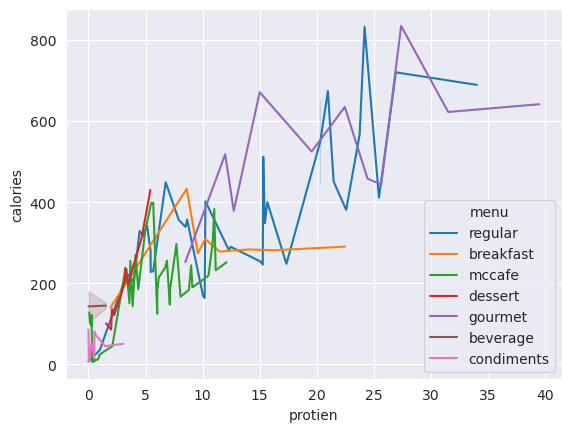

In [286]:
sns.lineplot(x="protien", y="calories", data=df,hue="menu")
sns.set_style("darkgrid")


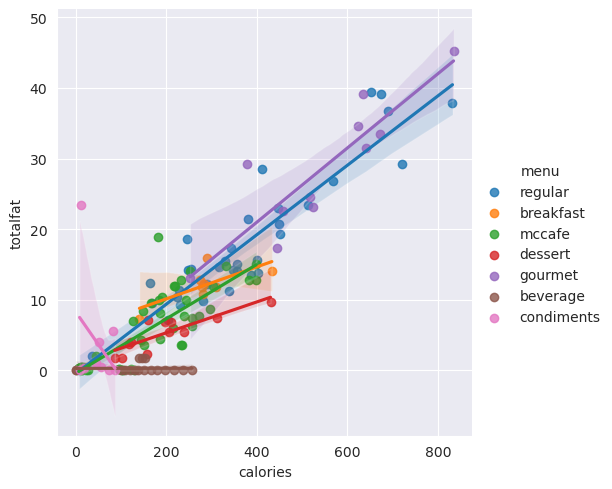

In [287]:
sns.lmplot(x="calories", y="totalfat", hue="menu", data=df);

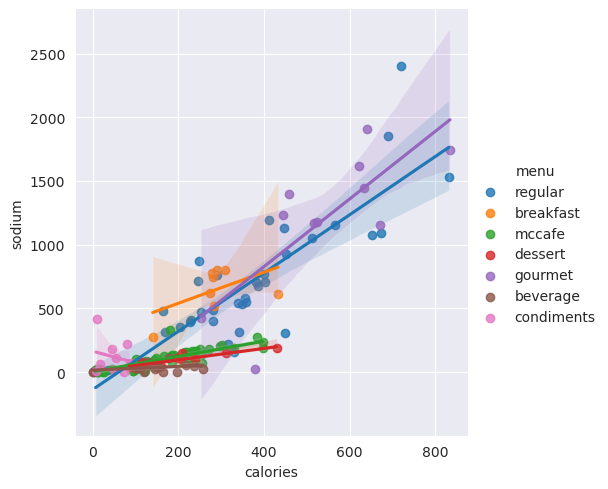

In [288]:
sns.lmplot(x="calories", y="sodium", hue="menu", data=df);

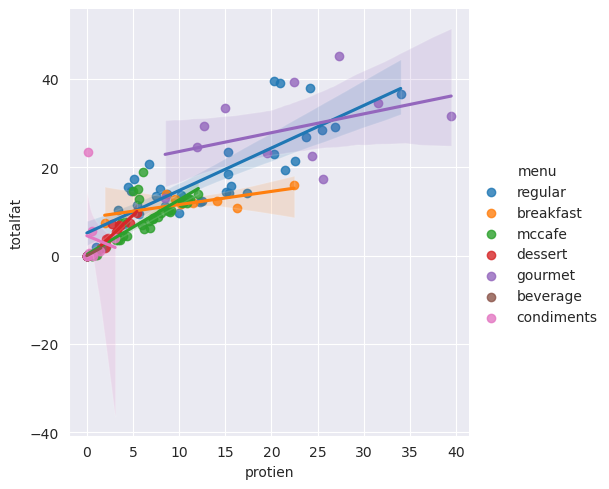

In [289]:
sns.lmplot(x="protien", y="totalfat", hue="menu", data=df);

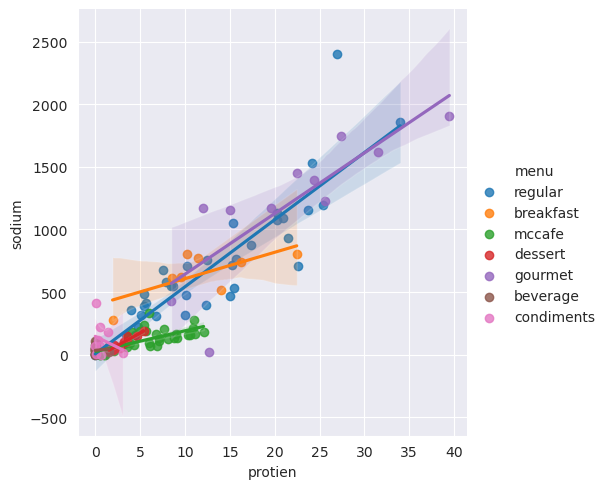

In [290]:
sns.lmplot(x="protien", y="sodium", hue="menu", data=df);

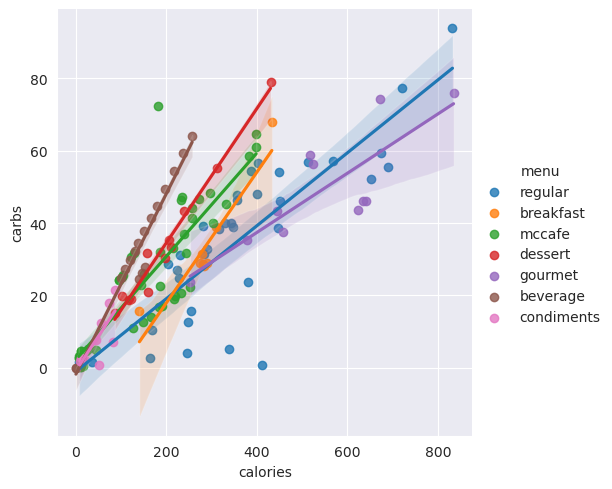

In [291]:
sns.lmplot(x="calories", y="carbs", hue="menu", data=df);

Data is the language of the powerholders

We can get more insights from this data as it is never ending process

END 